# Lab02

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from image_analyzer import Image_analyzer
import os

## Fig. 3.38

In [2]:
file_dir = os.getcwd()
images_dir = file_dir+'/images/'
fig_03_38_path = images_dir+'Fig0338(a)(blurry_moon).pgm'

fig_03_38_analyzer = Image_analyzer(fig_03_38_path)
#read image
fig_03_38_analyzer.mypgmread()

Reading image from: /Users/fuad/Documents/coding/image_processing_tutorials/003_pgn_shapening_and_histogram/images/Fig0338(a)(blurry_moon).pgm


(array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 466,
 540,
 255)

In [3]:
laplacian_filter = np.array([[0, 1,  0],
                             [1, -4, 1],
                             [0,  1, 0]])
laplacian_image_without_scaling = fig_03_38_analyzer.myImageCorrelation(laplacian_filter)
laplacian_image_scaled = Image_analyzer().image_array_scale(laplacian_image_without_scaling)
sharp_image = fig_03_38_analyzer.get_image_array() - laplacian_image_without_scaling
sharp_image_scaled = np.clip( Image_analyzer().image_array_scale(sharp_image) , 0, 255)

laplacian_filter_1 = np.array([[1, 1, 1],
                             [1, -8, 1],
                             [1,  1, 1]])
laplacian_image_without_scaling_1 = fig_03_38_analyzer.myImageCorrelation(laplacian_filter_1)
sharp_image_1 = np.clip(fig_03_38_analyzer.get_image_array() - laplacian_image_without_scaling_1, 0, 255)


Orjinal görüntüye yani Fig 3.38(a) laplacian filtresi ile korelasyon yapıldığında Fig 3.38(b) figürü elde edilmişitir. Bu görüntüyü çizerken vmin = , vmax = 255 seçildiğinden dolayı 0 ın altındaki değerler ve 255 üstündeki değerler kırpılmış durumdadır. Bu görüntünün linear scale edilmiş hali ise Fig 3.38 (c) 'de gösterilmiştir, scaling işleminin etkisiyle gri olarak gözükmektedir. Sharpened image yani keskinleştirilmiş görüntüyü elde edebilmek için ise orjinal görüntüden laplacian işlemi uygulanmış görüntüden çıkarılmıştır ve Fig 3.38 (d) 'de gösterilmiştir, 0'ın altında ve 255'in üstündeki değerler kıpılmıştır. e şıkkında ise ikici laplacian filtresi olan laplacian_filter_1 ile aynı işlemler tekrarlanmıştır.

Text(0.5, 1.0, 'Fig3.38 (e): Sharpened Image with scaling')

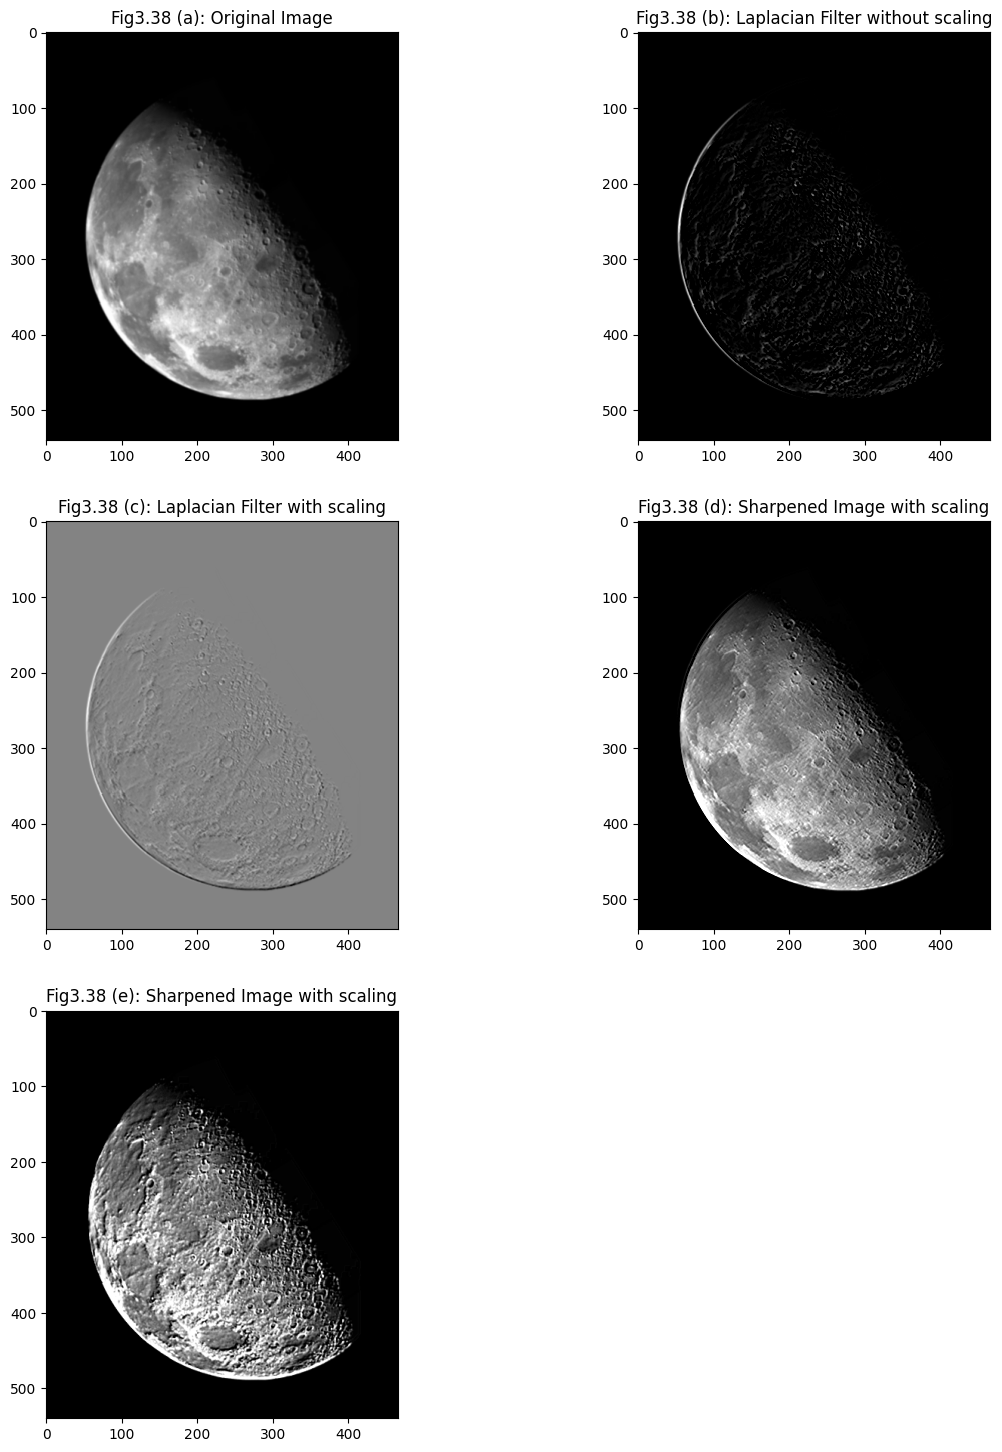

In [4]:
plt.figure(figsize=(14, 18))

plt.subplot(3, 2, 1)
plt.imshow(fig_03_38_analyzer.get_image_array(), cmap='gray', vmin=0, vmax=255)
plt.title('Fig3.38 (a): Original Image')

plt.subplot(3, 2, 2)
plt.imshow(laplacian_image_without_scaling, cmap='gray', vmin=0, vmax=255)
plt.title('Fig3.38 (b): Laplacian Filter without scaling')

plt.subplot(3, 2, 3)
plt.imshow(laplacian_image_scaled, cmap='gray', vmin=0, vmax=255)
plt.title('Fig3.38 (c): Laplacian Filter with scaling')

plt.subplot(3, 2, 4)
plt.imshow(sharp_image, cmap='gray', vmin=0, vmax=255)
plt.title('Fig3.38 (d): Sharpened Image with scaling')

plt.subplot(3, 2, 5)
plt.imshow(sharp_image_1, cmap='gray', vmin=0, vmax=255)
plt.title('Fig3.38 (e): Sharpened Image with scaling')



## Fig 3.40

In [5]:
fig_03_40_path = images_dir+'Fig0340(a)(dipxe_text).pgm'

fig_03_40_analyzer = Image_analyzer(fig_03_40_path)
#read image
fig_03_40_analyzer.mypgmread()


Reading image from: /Users/fuad/Documents/coding/image_processing_tutorials/003_pgn_shapening_and_histogram/images/Fig0340(a)(dipxe_text).pgm


(array([[51, 51, 51, ..., 51, 51, 51],
        [51, 51, 51, ..., 51, 51, 51],
        [51, 51, 51, ..., 51, 51, 51],
        ...,
        [51, 51, 51, ..., 51, 51, 51],
        [51, 51, 51, ..., 51, 51, 51],
        [51, 51, 51, ..., 51, 51, 51]], dtype=uint8),
 320,
 138,
 255)

[[0.0317564  0.03751576 0.03965895 0.03751576 0.0317564 ]
 [0.03751576 0.04431963 0.04685151 0.04431963 0.03751576]
 [0.03965895 0.04685151 0.04952803 0.04685151 0.03965895]
 [0.03751576 0.04431963 0.04685151 0.04431963 0.03751576]
 [0.0317564  0.03751576 0.03965895 0.03751576 0.0317564 ]]


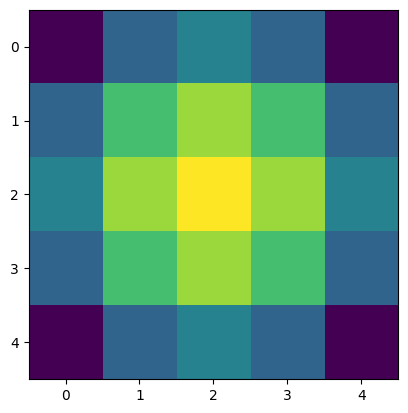

In [6]:
gaussian_filter_5x5 = Image_analyzer().get_gaussian_filter(5, 3)

print(gaussian_filter_5x5)
plt.imshow(gaussian_filter_5x5)


gaussian_image = fig_03_40_analyzer.myImageCorrelation(gaussian_filter_5x5)
uncharp_mask = fig_03_40_analyzer.get_image_array() - gaussian_image
uncharp_mask_used_fig = np.clip(fig_03_40_analyzer.get_image_array() + uncharp_mask, 0, 255)
high_boost_filtered = fig_03_40_analyzer.get_image_array() + 4.5 * uncharp_mask

Orjinal görüntüyü blurlamak için gauss filtesi oluşturulmuştur, fitre 5x5 filtredir ve standart sapması 3 'tür. Bu elde edilen filtre ile orjinal görüntüyü korelasyon işlemi uygulayarak Fig 3.40 (b)'deki görüntü oluşturulmuştur. Orjinal görüntüden blur görüntü çıkarıldığında unsharping mask figure 3.40 (c)'deki gibi elde edilmiştir. Sonra bu maske orjinal görüntüden çıkarıldığında d ' deki görüntü elde edilmiştir. e de ise High Boost Filtered Image çizdirlmiştir o görüntü ise orijinal görüntün , makesnin 4.5 katsayısı ile çarparak elede edilmiştir.

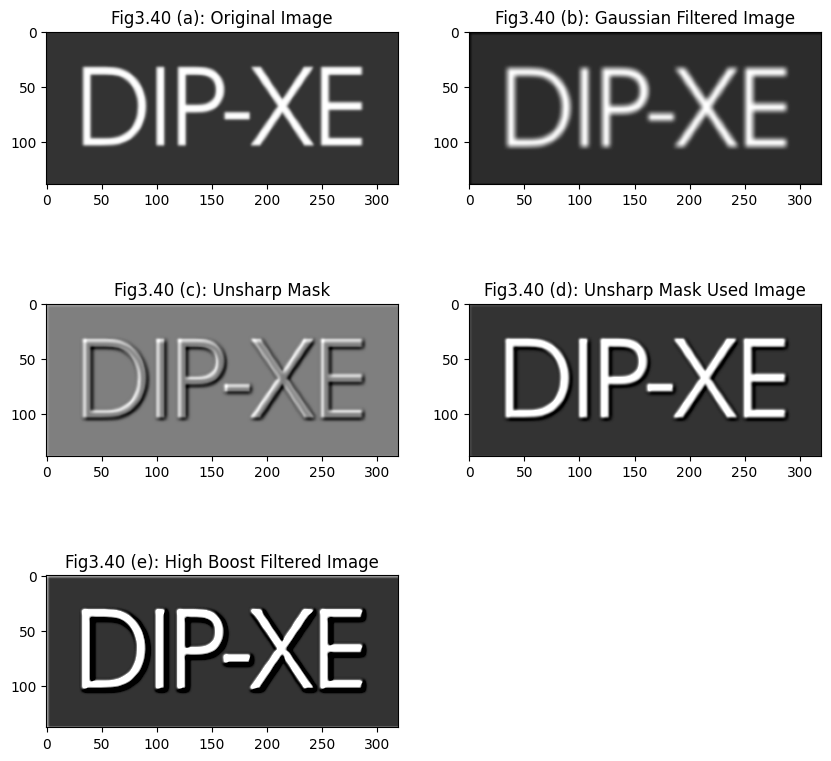

In [7]:
# plot all the images
plt.figure(figsize=(10, 10))
plt.subplot(3, 2, 1)
plt.imshow(fig_03_40_analyzer.get_image_array(), cmap='gray', vmin=0, vmax=255)
plt.title('Fig3.40 (a): Original Image')

plt.subplot(3, 2, 2)
plt.imshow(gaussian_image, cmap='gray')
plt.title('Fig3.40 (b): Gaussian Filtered Image')

plt.subplot(3, 2, 3)
plt.imshow(Image_analyzer().image_array_scale(uncharp_mask), cmap='gray', vmin=0, vmax=255)
plt.title('Fig3.40 (c): Unsharp Mask')

plt.subplot(3, 2, 4)
plt.imshow(uncharp_mask_used_fig, cmap='gray', vmin = 0, vmax = 255)
plt.title('Fig3.40 (d): Unsharp Mask Used Image')

plt.subplot(3, 2, 5)
plt.imshow(high_boost_filtered, cmap='gray',vmin=0, vmax=255)
plt.title('Fig3.40 (e): High Boost Filtered Image')
plt.show()


## Figure 3.20

In [8]:
fig_03_20_2_path = images_dir+'Fig0320(1)(top_left).pgm'
fig_03_20_2_analyzer = Image_analyzer(fig_03_20_2_path)
#read image
fig_03_20_2_analyzer.mypgmread()

fig_03_20_3_path = images_dir+'Fig0320(2)(2nd_from_top).pgm'
fig_03_20_3_analyzer = Image_analyzer(fig_03_20_3_path)
#read image
fig_03_20_3_analyzer.mypgmread()

fig_03_20_4_path = images_dir+'Fig0320(3)(third_from_top).pgm'
fig_03_20_4_analyzer = Image_analyzer(fig_03_20_4_path)
#read image
fig_03_20_4_analyzer.mypgmread()

fig_03_20_1_path = images_dir+'Fig0320(4)(bottom_left).pgm'
fig_03_20_1_analyzer = Image_analyzer(fig_03_20_1_path)
#read image
fig_03_20_1_analyzer.mypgmread()


Reading image from: /Users/fuad/Documents/coding/image_processing_tutorials/003_pgn_shapening_and_histogram/images/Fig0320(1)(top_left).pgm
Reading image from: /Users/fuad/Documents/coding/image_processing_tutorials/003_pgn_shapening_and_histogram/images/Fig0320(2)(2nd_from_top).pgm
Reading image from: /Users/fuad/Documents/coding/image_processing_tutorials/003_pgn_shapening_and_histogram/images/Fig0320(3)(third_from_top).pgm
Reading image from: /Users/fuad/Documents/coding/image_processing_tutorials/003_pgn_shapening_and_histogram/images/Fig0320(4)(bottom_left).pgm


(array([[13, 13, 13, ..., 36, 36, 33],
        [13, 13, 13, ..., 35, 35, 31],
        [13, 13, 13, ..., 29, 29, 26],
        ...,
        [19, 13, 13, ..., 58, 56, 56],
        [20, 15, 13, ..., 56, 56, 53],
        [22, 18, 13, ..., 55, 55, 49]], dtype=uint8),
 500,
 500,
 255)

Aşağıda 3.20 de bulunan orjinal görüntüler çizdirilmiştir. ve her görüntünün histogramı ve cdf'i çizdirilmiştir. 
Birinci görüntü karanlık bir görüntüdür bu yüzden histogramında düşük sayılarda (0 - 60 arasında) yoğunlaştığı gözükmektedir, cdf de o değerden sonra bir anda çok hızlı yükselmektedir bu da piksel değerlerin o yükselmeden önceki bölgede yoğunlaştığını ve görüntün karanlık olduğunu temsil etmektedir. ikinci görüntüde ise fazla aydınlık olduğu için histogram yüksek sayılarda yoğunlaşmaktadır, cdf de yüksek sayılarda artmaya başlamaktadır. 
Üçte ise renkler arada kadığı için sanki bir bölgeye sıkışmış gibi olduğundan, histogramda da orada bir bölgede yoğunlaşmaktadır.
Dördüncü görüntü ise normal renklere sahip olduğundan histogramı de belli bir bölgede yoğunlaşmıyor, uniform dağılıma benziyor ve tüm sayılara dağılmış durumdadır.

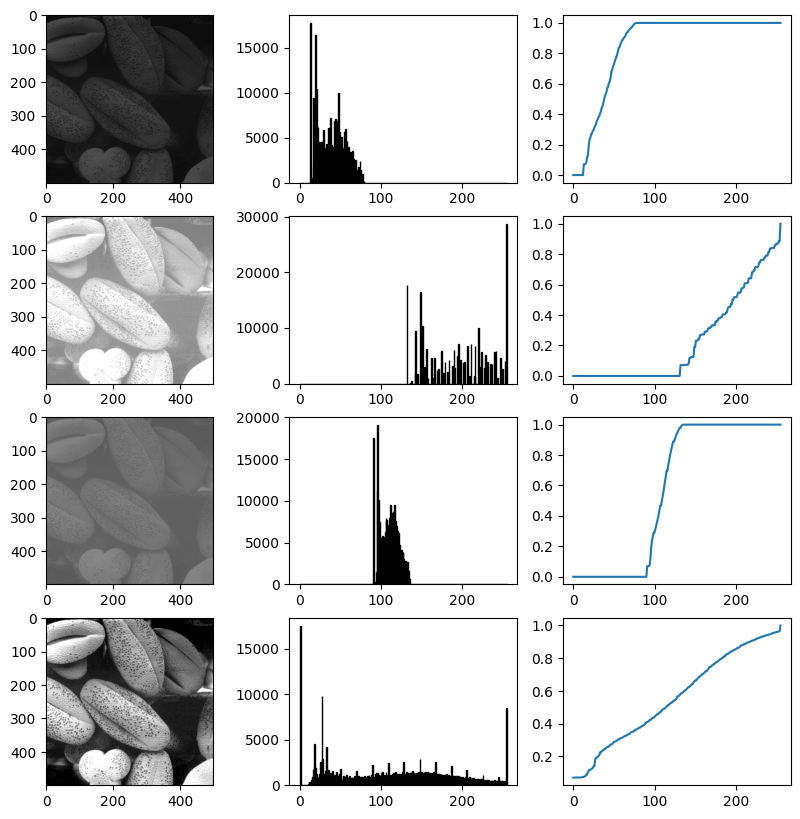

In [14]:
#show all figures with their histograms as subplots
plt.figure(figsize=(10, 10))
plt.subplot(4, 3, 1)
plt.imshow(fig_03_20_1_analyzer.get_image_array(), cmap='gray', vmin=0, vmax=255)

plt.subplot(4, 3, 2)
plt.hist(fig_03_20_1_analyzer.get_image_array().ravel(), bins=256, range=(0, 255), fc='k', ec='k')

plt.subplot(4, 3, 3)
plt.plot(fig_03_20_1_analyzer.myImageNormalizedCdf(fig_03_20_1_analyzer.get_image_array()))

plt.subplot(4, 3, 4)
plt.imshow(fig_03_20_2_analyzer.get_image_array(), cmap='gray', vmin=0, vmax=255)

plt.subplot(4, 3, 5)
plt.hist(fig_03_20_2_analyzer.get_image_array().ravel(), bins=256, range=(0, 255), fc='k', ec='k')

plt.subplot(4, 3, 6)
plt.plot(fig_03_20_2_analyzer.myImageNormalizedCdf(fig_03_20_2_analyzer.get_image_array()))

plt.subplot(4, 3, 7)
plt.imshow(fig_03_20_3_analyzer.get_image_array(), cmap='gray', vmin=0, vmax=255)

plt.subplot(4, 3, 8)
plt.hist(fig_03_20_3_analyzer.get_image_array().ravel(), bins=256, range=(0, 255), fc='k', ec='k')

plt.subplot(4, 3, 9)
plt.plot(fig_03_20_3_analyzer.myImageNormalizedCdf(fig_03_20_3_analyzer.get_image_array()))

plt.subplot(4, 3, 10)
plt.imshow(fig_03_20_4_analyzer.get_image_array(), cmap='gray', vmin=0, vmax=255)

plt.subplot(4, 3, 11)
plt.hist(fig_03_20_4_analyzer.get_image_array().ravel(), bins=256, range=(0, 255), fc='k', ec='k')

plt.subplot(4, 3, 12)
plt.plot(fig_03_20_4_analyzer.myImageNormalizedCdf(fig_03_20_4_analyzer.get_image_array()))

plt.show()



Aşağıdaki görüntüde ise histogram equalization sonrası, orjinal resimler ile birlikte histogram equalization yapılmış görüntüler, histogramları ve cdfleri ile birilikte çizdirilmiştir, ilk 3 görüntüde açık bir şekilde histogramlarında piksel tüm değerlere dağıldığı gözükmektedir ve görüntülerin hepsi orjinal hallerine nazaran iyileşmiş durumdalar. Son görüntüde ise çok büyük bir fark olamamış çünkü zaten orjinal görüntünün piksel değerleri histogramda dağılmış durumdadır, onun için çok çok küçük bir değişim olmuştue.

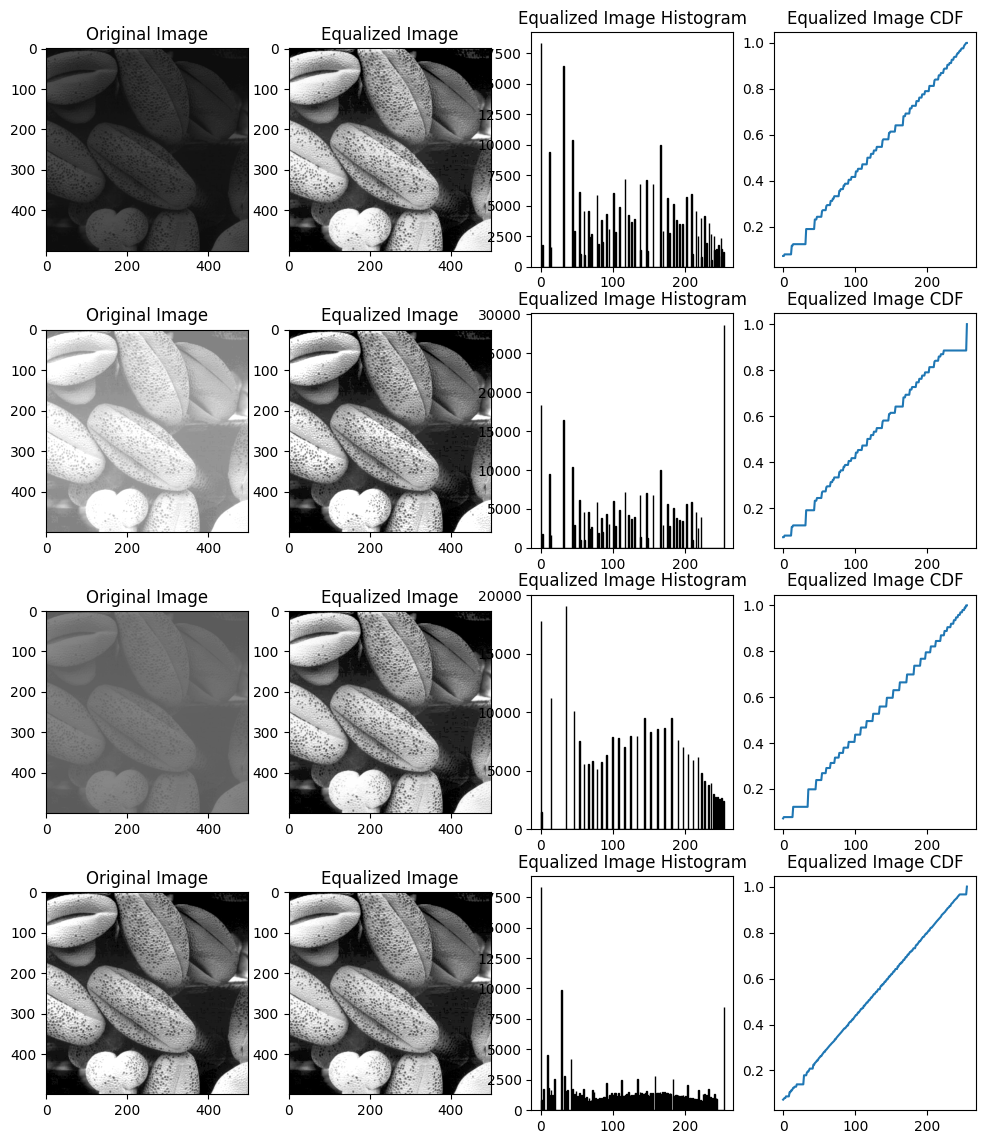

In [11]:
#show all figures , and their equalized images and equalized images histograms as subplots
plt.figure(figsize=(12, 14))
plt.subplot(4, 4, 1)
plt.imshow(fig_03_20_1_analyzer.get_image_array(), cmap='gray', vmin=0, vmax=255)
plt.title('Original Image')

plt.subplot(4, 4, 2)
fig_03_20_1_equalized = Image_analyzer().image_array_scale(fig_03_20_1_analyzer.myImageHistogramEqualization())
plt.imshow(fig_03_20_1_equalized, cmap='gray', vmin=0, vmax=255)
plt.title('Equalized Image')

plt.subplot(4, 4, 3)
plt.hist(fig_03_20_1_equalized.ravel(), bins=256, range=(0, 255), fc='k', ec='k')
plt.title('Equalized Image Histogram')

plt.subplot(4, 4, 4)
plt.plot(fig_03_20_2_analyzer.myImageNormalizedCdf(fig_03_20_1_equalized))
plt.title('Equalized Image CDF')

plt.subplot(4, 4 ,5)
plt.imshow(fig_03_20_2_analyzer.get_image_array(), cmap='gray', vmin=0, vmax=255)
plt.title('Original Image')

plt.subplot(4, 4, 6)
fig_03_20_2_equalized = Image_analyzer().image_array_scale(fig_03_20_2_analyzer.myImageHistogramEqualization())
plt.imshow(fig_03_20_2_equalized, cmap='gray', vmin=0, vmax=255)
plt.title('Equalized Image')

plt.subplot(4, 4, 7)
plt.hist(fig_03_20_2_equalized.ravel(), bins=256, range=(0, 255), fc='k', ec='k')
plt.title('Equalized Image Histogram')

plt.subplot(4, 4, 8)
plt.plot(fig_03_20_2_analyzer.myImageNormalizedCdf(fig_03_20_2_equalized))
plt.title('Equalized Image CDF')

plt.subplot(4, 4, 9)
plt.imshow(fig_03_20_3_analyzer.get_image_array(), cmap='gray', vmin=0, vmax=255)
plt.title('Original Image')

plt.subplot(4, 4, 10)
fig_03_20_3_equalized = Image_analyzer().image_array_scale(fig_03_20_3_analyzer.myImageHistogramEqualization())
plt.imshow(fig_03_20_3_equalized, cmap='gray', vmin=0, vmax=255)
plt.title('Equalized Image')

plt.subplot(4, 4, 11)
plt.hist(fig_03_20_3_equalized.ravel(), bins=256, range=(0, 255), fc='k', ec='k')
plt.title('Equalized Image Histogram')

plt.subplot(4, 4, 12)
plt.plot(fig_03_20_3_analyzer.myImageNormalizedCdf(fig_03_20_3_equalized))
plt.title('Equalized Image CDF')

plt.subplot(4, 4, 13)
plt.imshow(fig_03_20_4_analyzer.get_image_array(), cmap='gray', vmin=0, vmax=255)
plt.title('Original Image')

plt.subplot(4, 4, 14)
fig_03_20_4_equalized = Image_analyzer().image_array_scale(fig_03_20_4_analyzer.myImageHistogramEqualization())
plt.imshow(fig_03_20_4_equalized, cmap='gray', vmin=0, vmax=255)
plt.title('Equalized Image')

plt.subplot(4, 4, 15)
plt.hist(fig_03_20_4_equalized.ravel(), bins=256, range=(0, 255), fc='k', ec='k')
plt.title('Equalized Image Histogram')

plt.subplot(4, 4, 16)
plt.plot(fig_03_20_4_analyzer.myImageNormalizedCdf(fig_03_20_4_equalized))
plt.title('Equalized Image CDF')
plt.show()
